# DBSCAN

In [1]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_moons

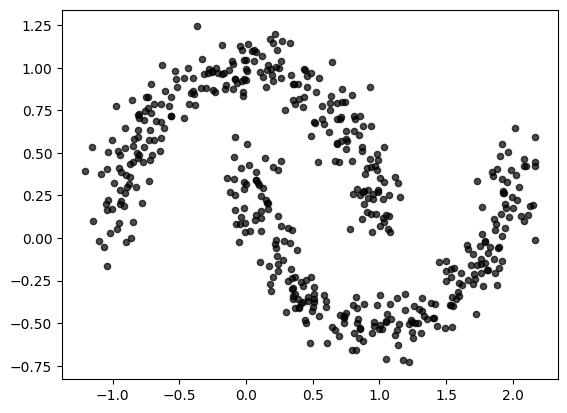

In [2]:
X = make_moons(n_samples=500, noise=0.1, random_state=42)[0]

plt.scatter(X[:, 0], X[:, 1], c='k', s=20, alpha=0.7)
plt.show()

## Scikit-Learn

In [3]:
from sklearn.cluster import DBSCAN

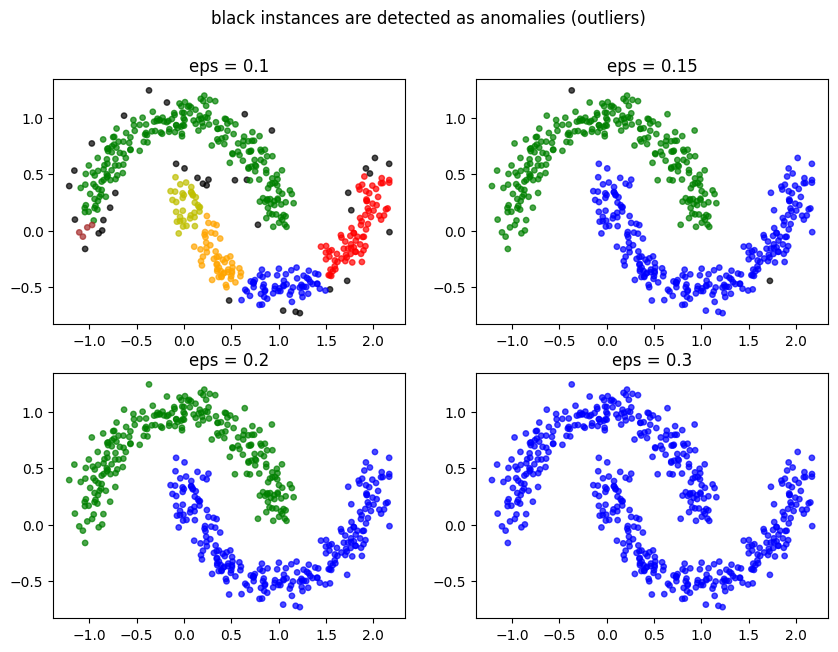

In [4]:
colors = np.array(['b', 'g', 'r', 'orange', 'y', 'brown', 'purple', 'k'])
eps_values = [0.1, 0.15, 0.2, 0.3]

plt.subplots(2, 2, figsize=(10, 7))
plt.suptitle('black instances are detected as anomalies (outliers)')
for i in range(4):
    dbscan = DBSCAN(eps=eps_values[i], min_samples=5)
    dbscan.fit(X)
    plt.subplot(2, 2, i + 1)
    plt.title('eps = ' + str(eps_values[i]))
    plt.scatter(X[:, 0], X[:, 1], c=colors[dbscan.labels_], s=15, alpha=0.7)

In [5]:
# it seems that eps=0.2 is a good one
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
print('clusters:', np.unique(dbscan.labels_))

clusters: [0 1]


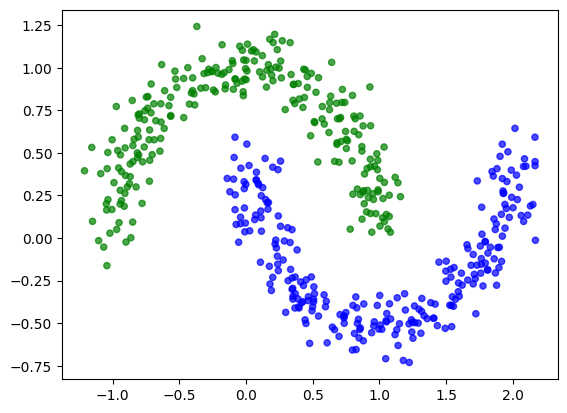

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=colors[dbscan.labels_], s=20, alpha=0.7)
plt.show()

## Implementation

- $\epsilon$**-neighborhood**: a circlular region with radius $\epsilon$ around each instance
- **Core instance**: an instance that has at least `min_samples` instances in its $\epsilon$-neighborhood (containing itself)
- the instance that is not a *core instance* and *does not have a core instance in its $\epsilon$-neighborhood* is detected as **anomaly** (**outlier**)
- all instances in the $\epsilon$-neighborhood of a core instance belong to the same cluster
---
this model iterates all instances, finds core instances and goes through their neighbors and put them in the same cluster

In [7]:
class myDBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        self.labels = None
        
    def fit(self, X):
        n_samples, n_features = X.shape
        # Labels:
        # -2 : not considered yet
        # -1 : detected as noise
        # 0 and above : id of cluster
        self.labels = -2 * np.ones((n_samples,), dtype=np.int32)
        
        cluster_id = 0
        for i in range(n_samples):
            if self.labels[i] != -2: continue
                
            neighbor_idxs = self._get_neighbors(X, X[i])
            if len(neighbor_idxs) < self.min_samples:
                self.labels[i] = -1
            else:
                self._grow_cluster(X, i, neighbor_idxs, cluster_id)
                cluster_id += 1
                
                
    def _grow_cluster(self, X, x_idx, neighbor_idxs, cluster_id):
        self.labels[x_idx] = cluster_id
        i = 0
        while i < len(neighbor_idxs):
            x_neighbor_idx = neighbor_idxs[i]
            x_neighbor = X[x_neighbor_idx]
            if self.labels[x_neighbor_idx] == -1:
                self.labels[x_neighbor_idx] = cluster_id
            elif self.labels[x_neighbor_idx] == -2:
                self.labels[x_neighbor_idx] = cluster_id
                x_neighbor_neighbors = self._get_neighbors(X, x_neighbor)
                if len(x_neighbor_neighbors) >= self.min_samples:
                    neighbor_idxs += x_neighbor_neighbors
            i += 1
            
            
    def _get_neighbors(self, X, x):
        neighbor_idxs = [i for i in range(len(X)) if self._euclidean_distance(X[i], x) < self.eps]
        return neighbor_idxs
        
        
    def _euclidean_distance(self, x1, x2):
        distance = np.sqrt(np.sum((x1 - x2) ** 2))
        return distance
    
    def fit_predict(self, X):
        self.fit(X)
        return self.labels

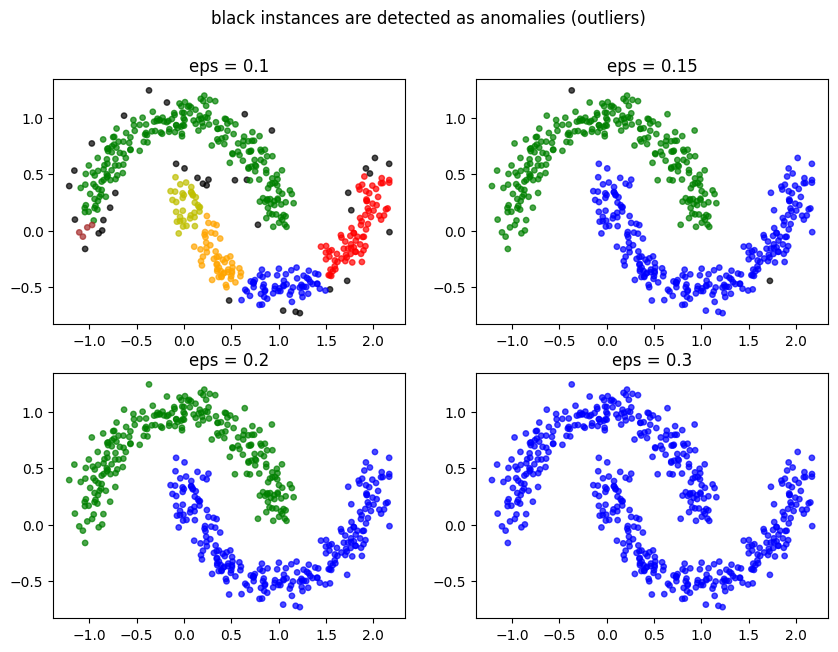

In [8]:
plt.subplots(2, 2, figsize=(10, 7))
plt.suptitle('black instances are detected as anomalies (outliers)')
for i in range(4):
    dbscan = myDBSCAN(eps=eps_values[i], min_samples=5)
    labels = dbscan.fit_predict(X)
    plt.subplot(2, 2, i + 1)
    plt.title('eps = ' + str(eps_values[i]))
    plt.scatter(X[:, 0], X[:, 1], c=colors[labels], s=15, alpha=0.7)

## Prediction

there is no `predict` function in DBSCAN class; we should use some classification models like *K-Nearest Neighbors (KNN)* to predict the cluster of a new instance

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, labels)

KNeighborsClassifier(n_neighbors=7)

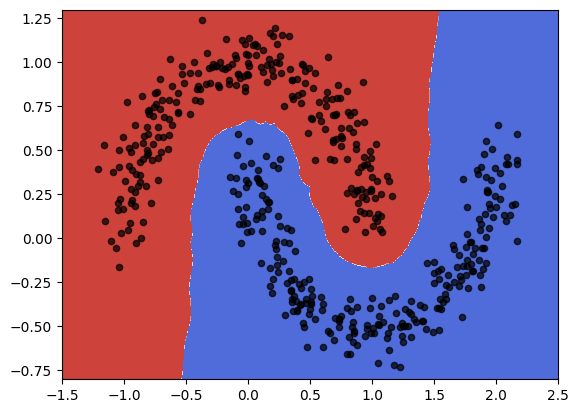

In [12]:
xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 800), np.linspace(-0.8, 1.3, 420))
z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c='k', s=20, alpha=0.7)
plt.show()

here are some other datasets, clustering with DBSCAN

In [13]:
from sklearn.datasets import make_circles, make_blobs

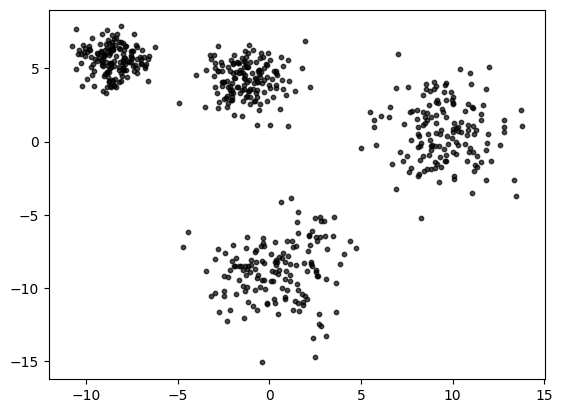

In [14]:
X = make_blobs(n_samples=600, n_features=2, centers=4, cluster_std=[1, 1.2, 2, 2], random_state=7)[0]

plt.scatter(X[:, 0], X[:, 1], c='k', s=10, alpha=0.7)
plt.show()

In [15]:
dbscan = DBSCAN(eps=1.2, min_samples=3)
labels = dbscan.fit_predict(X)
print(np.unique(labels))

[-1  0  1  2  3]


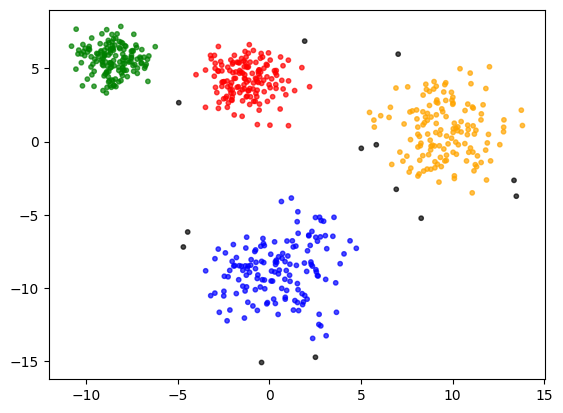

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=colors[dbscan.labels_], s=10, alpha=0.7)
plt.show()

we can increase `eps` in order to reduce the number of anomalies

In [17]:
dbscan = DBSCAN(eps=1.5, min_samples=3)
labels = dbscan.fit_predict(X)
print(np.unique(labels))

[-1  0  1  2  3]


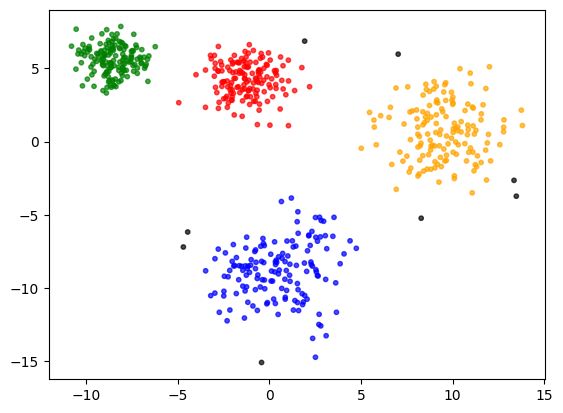

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=colors[dbscan.labels_], s=10, alpha=0.7)
plt.show()

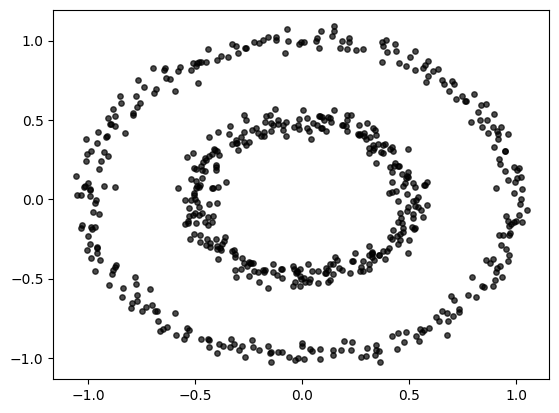

In [19]:
X = make_circles(n_samples=600, factor=0.5, noise=0.04, random_state=42)[0]

plt.scatter(X[:, 0], X[:, 1], c='k', s=15, alpha=0.7)
plt.show()

In [20]:
dbscan = DBSCAN(eps=0.2, min_samples=3)
labels = dbscan.fit_predict(X)
print(np.unique(labels))

[0 1]


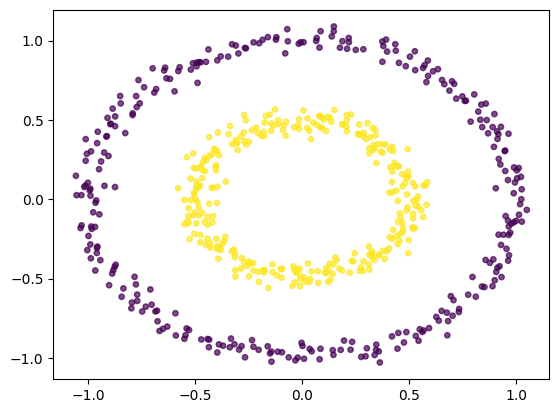

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=15, alpha=0.7)
plt.show()